<a href="https://colab.research.google.com/github/Pratt33/ML_Algorithms_From_Scratch/blob/main/Gradient_Descent(Both_Variable).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Objective:

1. Predicting a target variable using a linear relationship based on given features.

2. This can be applied in stock price prediction, sales forecasting, or demand estimation.

# Problem Statement:

1. Given a dataset with one independent variable (X) and one dependent variable (y),

2. we aim to fit a regression model using both Sklearn’s Linear Regression and a

3. custom Gradient Descent implementation.

# Business Constraints:

1. - Model interpretability is important.

2. - Predictions should be computationally efficient.

3. - Training time should be minimal for real-time applications.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.animation as animation

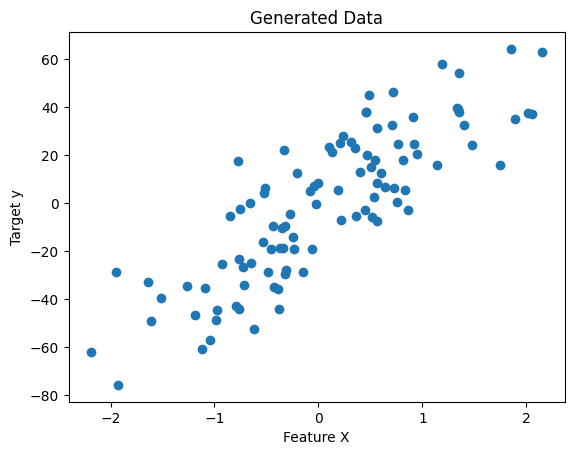

In [2]:
# Generating Synthetic Data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=13)
plt.scatter(X, y)
plt.title("Generated Data")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.show()

In [3]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [4]:
# Implementing Linear Regression using Sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Sklearn Model Coefficient: {lr.coef_[0]}")
print(f"Sklearn Model Intercept: {lr.intercept_}")
print(f"R2 Score (Sklearn): {r2_score(y_test, y_pred_lr):.4f}")

Sklearn Model Coefficient: 28.125973315135614
Sklearn Model Intercept: -2.2710144261783825
R2 Score (Sklearn): 0.6345


In [5]:
# Implementing Gradient Descent Linear Regression
class GDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.m = 0
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs
        self.history = []  # Store values for animation

    def fit(self, X, y):
        for i in range(self.epochs):
            y_pred = self.m * X.ravel() + self.b
            loss_slope_b = -2 * np.sum(y - y_pred)
            loss_slope_m = -2 * np.sum((y - y_pred) * X.ravel())

            self.b -= self.lr * loss_slope_b
            self.m -= self.lr * loss_slope_m

            # Store history for visualization
            loss = np.mean((y - y_pred) ** 2)
            self.history.append((self.m, self.b, loss))

    def predict(self, X):
        return self.m * X + self.b

In [6]:
# Training GD Model
gd = GDRegressor(learning_rate=0.001, epochs=50)
gd.fit(X_train, y_train)
y_pred_gd = gd.predict(X_test)
print(f"Gradient Descent Model Coefficient: {gd.m}")
print(f"Gradient Descent Model Intercept: {gd.b}")
print(f"R2 Score (Gradient Descent): {r2_score(y_test, y_pred_gd):.4f}")

Gradient Descent Model Coefficient: 28.11750206751203
Gradient Descent Model Intercept: -2.2676402151821566
R2 Score (Gradient Descent): 0.6346


Text(0, 0.5, 'Target y')

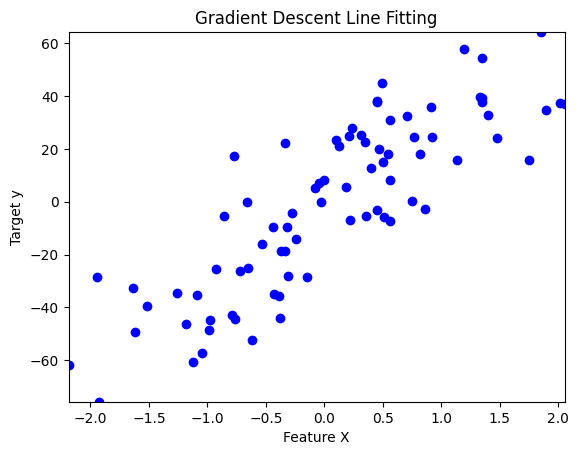

In [7]:
# Animations for Gradient Descent Training
fig, ax = plt.subplots()
x_vals = np.linspace(min(X_train), max(X_train), 100)
line, = ax.plot([], [], 'r-', lw=2)
ax.scatter(X_train, y_train, color='blue', label="Data Points")
ax.set_xlim(min(X_train), max(X_train))
ax.set_ylim(min(y_train), max(y_train))
ax.set_title("Gradient Descent Line Fitting")
ax.set_xlabel("Feature X")
ax.set_ylabel("Target y")

In [8]:
# Simulated gradient descent parameters
num_iterations = 100  # Define the number of iterations for the animation
coefficients = np.linspace(28, 28.12, num_iterations)  # Example coefficients
intercepts = np.linspace(-2.27, -2.26, num_iterations)

In [9]:
# Initialize the line
def init():
    line.set_data([], [])
    return line,

# Update the line for each frame
def update(frame):
    # Assuming you have the updated slope (coef) and intercept (intercept) for each iteration
    current_coef = ...  # Get the current coefficient for the frame
    current_intercept = ...  # Get the current intercept for the frame
    y_vals = current_coef * x_vals + current_intercept  # Calculate y values for the line
    line.set_data(x_vals, y_vals)
    return line,

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=range(num_iterations), init_func=init, blit=True)

# Show the animation
plt.show()

In [10]:
# Contour Plot for Loss Function
m_vals = np.linspace(-50, 50, 100)
b_vals = np.linspace(-50, 50, 100)
M, B = np.meshgrid(m_vals, b_vals)
Loss = np.array([[np.mean((y_train - (m * X_train.ravel() + b))**2) for m in m_vals] for b in b_vals])

Text(0.5, 1.0, 'Loss Function Contour Plot')

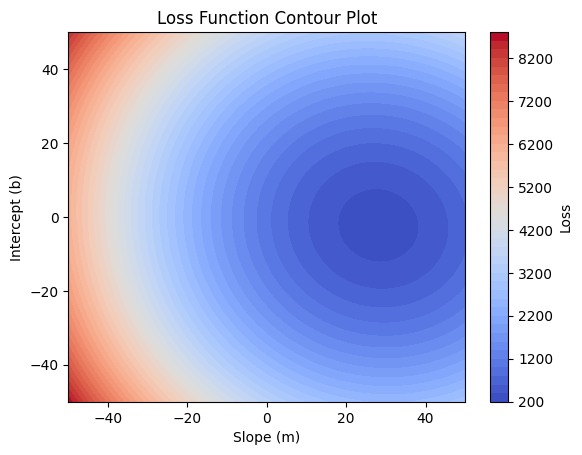

In [11]:
fig, ax = plt.subplots()
contour = ax.contourf(M, B, Loss, levels=50, cmap='coolwarm')
fig.colorbar(contour, ax=ax, label='Loss')
ax.set_xlabel("Slope (m)")
ax.set_ylabel("Intercept (b)")
ax.set_title("Loss Function Contour Plot")

In [12]:
point, = ax.plot([], [], 'yo', markersize=5)

In [13]:
def update_contour(frame):
    m, b, _ = gd.history[frame]
    point.set_data(m, b)
    return point,

ani_contour = FuncAnimation(fig, update_contour, frames=len(gd.history), interval=100)
plt.show()

# Conclusion:

1. - Both Sklearn's Linear Regression and custom GD implementation successfully fit the data.

2. - The custom GD model shows a smooth decrease in loss over iterations.

3. - The contour plot visually demonstrates the optimization process.

4. - The model can be further optimized using adaptive learning rates or advanced techniques like Adam Optimizer.